In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv ('adult.csv')
dataset.head(3)


,External Video Id,Golden Decision Str,Golden Policy Id,Final Golden Decision Str,Final Policy Id,Admin Decision Str,Admin Policy Id,Admin Ldap,Admin Review Date,Admin Quality Score,Original Quality Score,Post Calibration Admin Quality Score,Post Calibration Original Quality Score
0,tGKerC8PGMM,APPROVE RACY,2021,APPROVE RACY,2021,APPROVE RACY,2015,draindle,2018-08-01,1,1,1,100.00%
1,htespRHjg8Y,APPROVE,9008,APPROVE,9008,APPROVE,9008,kaabbott,2018-08-01,1,1,1,100.00%
2,J0bp1cgOUgs,APPROVE,9008,APPROVE,9008,APPROVE,9008,timothygraham,2018-07-31,1,0,1,0.00%


In [4]:
dataset = dataset[['Golden Decision Str', 'Final Policy Id', 'Post Calibration Admin Quality Score']]
dataset.head()

,Golden Decision Str,Final Policy Id,Post Calibration Admin Quality Score
0,APPROVE RACY,2021,1
1,APPROVE,9008,1
2,APPROVE,9008,1
3,STRIKE,2001,1
4,APPROVE,9008,0


In [5]:
# Encoding the categorical variables
dataset = pd.get_dummies(dataset, columns= ["Golden Decision Str","Final Policy Id"], prefix= ["str","id"])

In [11]:
dataset.head(5)

,Post Calibration Admin Quality Score,str_APPROVE,str_APPROVE PARENTAL GUIDANCE,str_APPROVE RACY,str_FORCE PRIVATE VIDEOS,str_REJECT,str_STRIKE,str_TERMINATE USER,id_1002,id_1004,...,id_5012,id_6001,id_6003,id_6048,id_6054,id_7001,id_7003,id_7008,id_9008,id_20121
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
# creating matrix of features to identify the dependent factor vs independent factors (parameters)
# Avoid the dummy variable trap is done by dropping 1 dummy variable from each category. Some libraries do it for you 
X = dataset.iloc[:, [1,2,3,4,5,6]].values  
y = dataset.iloc[:, 0].values

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0) # you can ommit random_state. It 
# keeps the same random sample for all sampling trials OR you can choose different value.

In [14]:
# A) Fitting Logistic Regression to the Training set
# Creating logestic regression class (classifier)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 622, 2305],
       [ 468, 8077]], dtype=int64)

In [16]:
import statsmodels.api as sm

In [17]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.514902
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22944
Model:                          Logit   Df Residuals:                    22938
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Aug 2018   Pseudo R-squ.:                 0.09973
Time:                        14:44:20   Log-Likelihood:                -11814.
converged:                       True   LL-Null:                       -13123.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9036      0.028     68.594      0.000       1.849       1.958
x2            -0.0556      0.

In [18]:
# Logistic Regression Model Fitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Predicting the test set results and caculating the accuracy

y_pred = logreg.predict(X_test)

In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.76


In [21]:
# Cross Validation

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


10-fold cross validation average accuracy: 0.754


In [22]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[ 388 1373]
 [ 275 4848]]


In [23]:
# Accuracy

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [24]:
"""Compute precision, recall, F-measure and support 

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test."""



'Compute precision, recall, F-measure and support \n\nThe precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.\n\nThe recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.\n\nThe F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.\n\nThe F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.\n\nThe support is the number of occurrences of each class in y_test.'

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.59      0.22      0.32      1761
          1       0.78      0.95      0.85      5123

avg / total       0.73      0.76      0.72      6884



In [ ]:
"""Interpretation: 

Of the entire test set, 73% of the promoted term deposit were the term deposit that the customers liked.
Of the entire test set, 76% of the customer's preferred term deposit were promoted."""


In [ ]:
"""ROC Curvefrom sklearn import metrics 

from ggplot import *

prob = clf1.predict_proba(Xtest)[:,1] fpr, sensitivity,  = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity)) ggplot(df, aes(x='fpr', y='sensitivity')) +\ geom_line() +\ geom_abline(linetype='dashed')"""


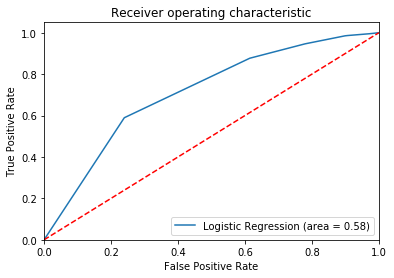

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()